In [293]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline



In [295]:
insurance_data=pd.read_csv(r"D:\Data Science\Final project\insurance_claims.csv")

In [297]:
insurance_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [299]:
#we can see some missing values denoted by ?, so lets replace that with np.nan
insurance_data.replace('?',np.nan,inplace=True)

In [301]:
insurance_data.shape

(1000, 40)

In [303]:
insurance_data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [305]:
insurance_data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [307]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [309]:
insurance_data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [311]:
insurance_data.duplicated().sum()

0

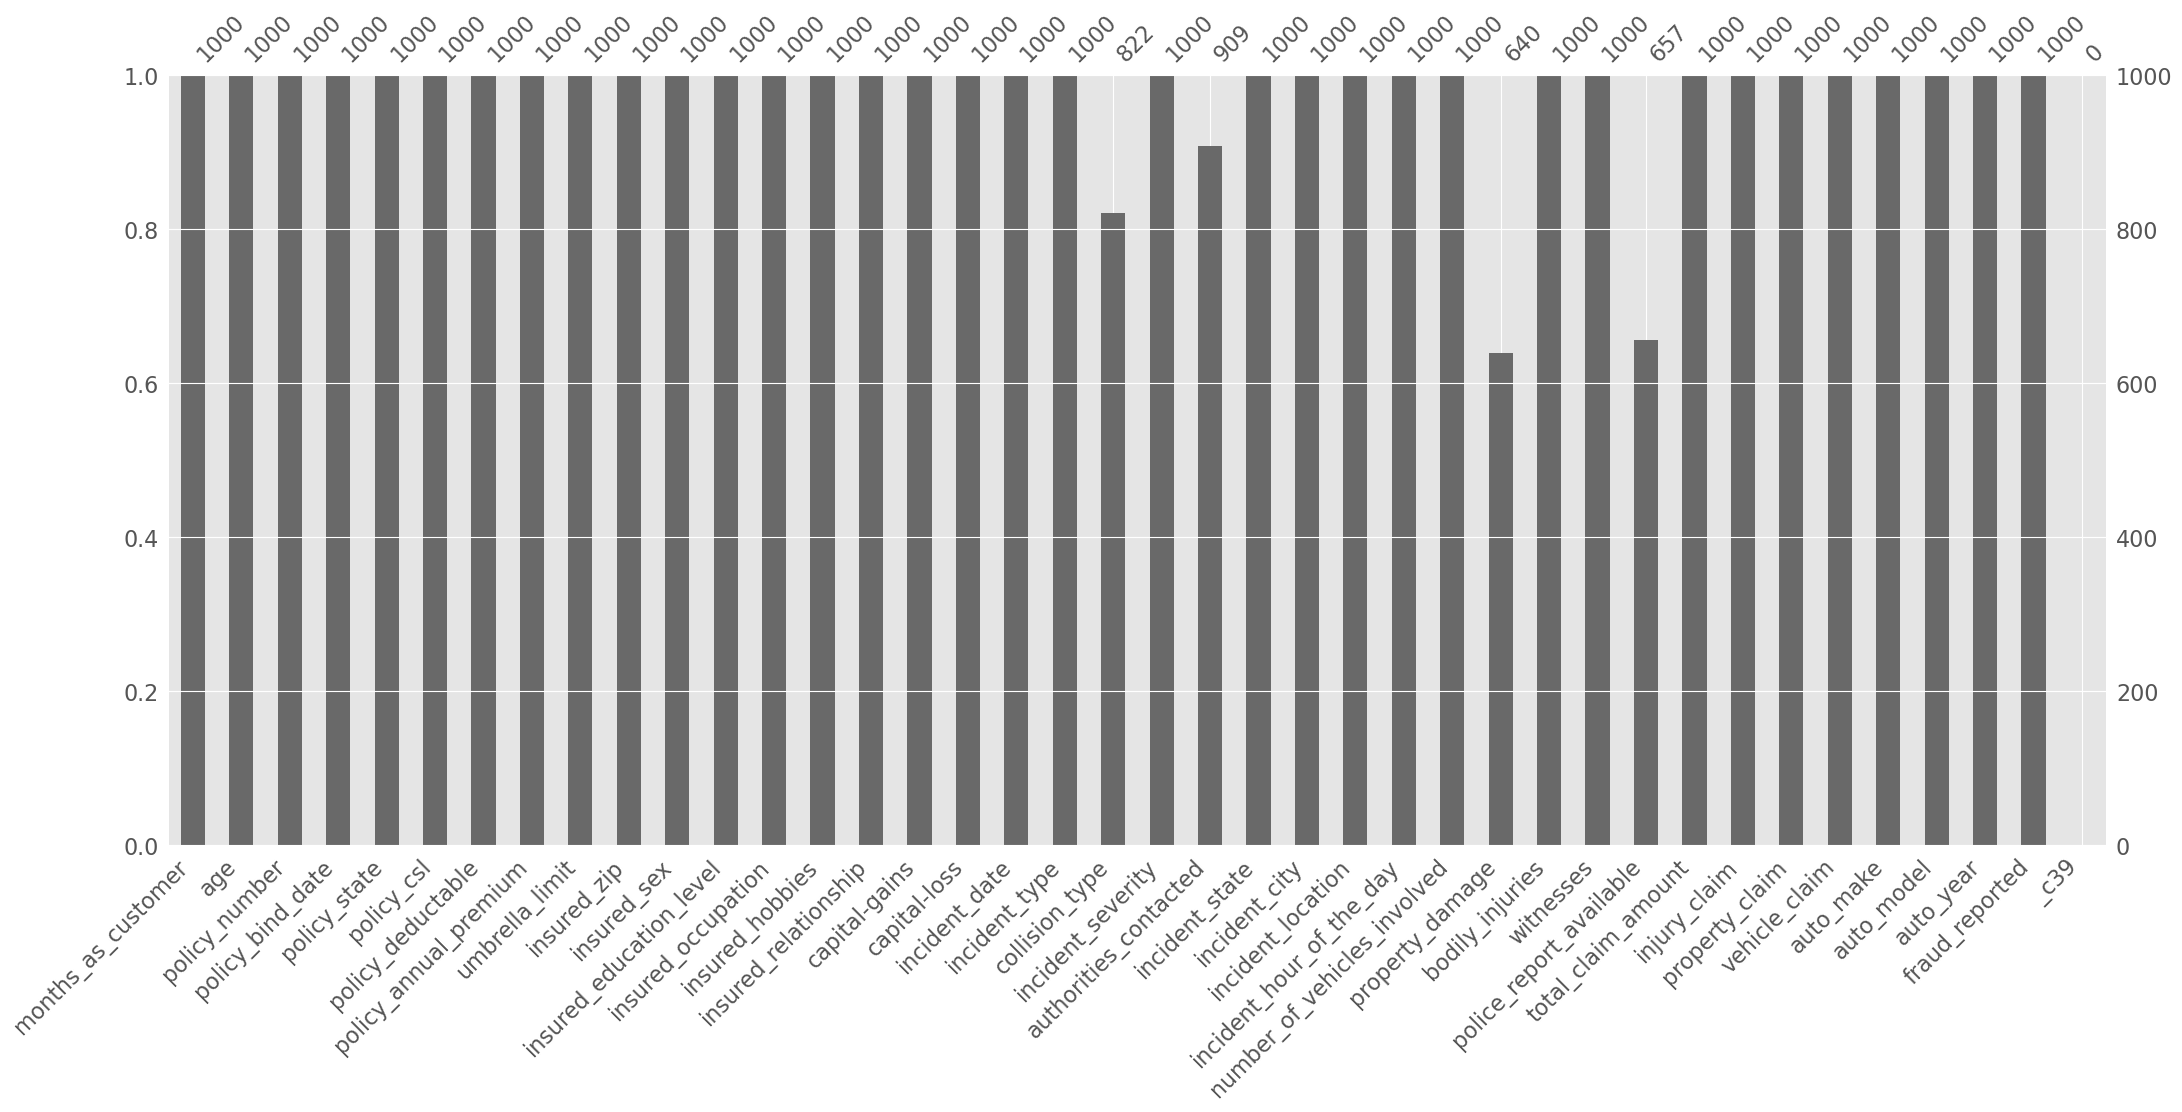

In [313]:
#visualizing missing values
import missingno as msno
msno.bar(insurance_data)
plt.show()

In [314]:
#Handling Missing values
insurance_data['collision_type']=insurance_data['collision_type'].fillna('NA')
insurance_data['property_damage']=insurance_data['property_damage'].fillna('NA') 
insurance_data['police_report_available']=insurance_data['police_report_available'].fillna('NA')
insurance_data['authorities_contacted']=insurance_data['authorities_contacted'].fillna('NA')


In [315]:
insurance_data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

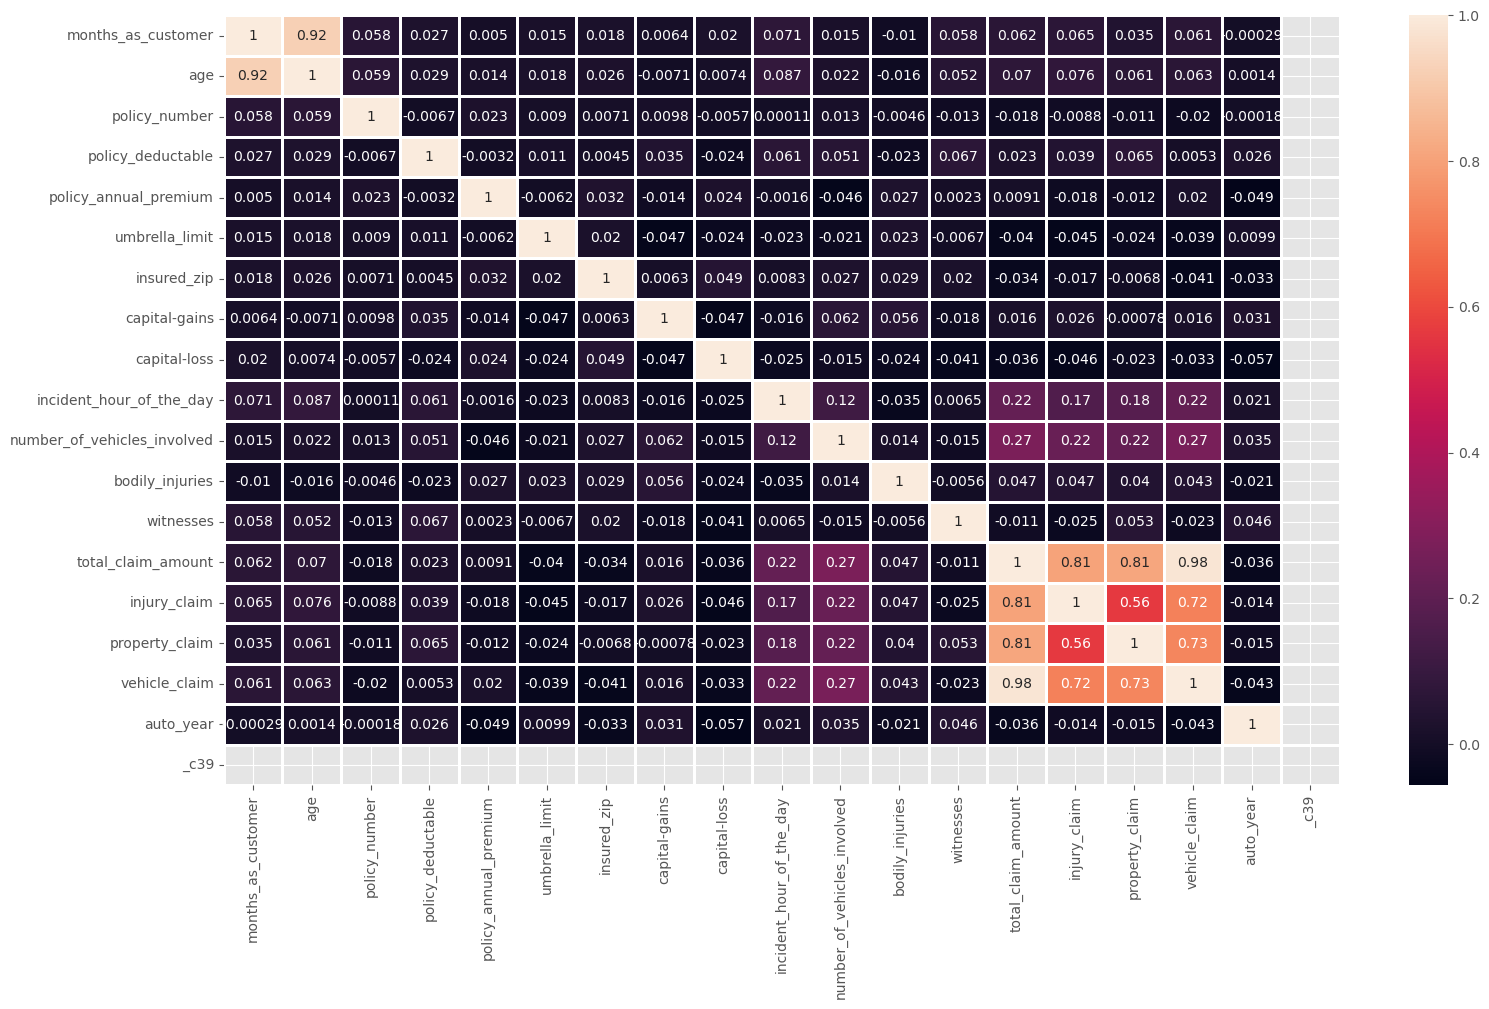

In [316]:
#heatmap
plt.figure(figsize=(18,10))
numeric_data=insurance_data.select_dtypes(include=['number']) #only correlating numeric values
corr=numeric_data.corr()
sns.heatmap(data=corr,annot=True,fmt='.2g',linewidth=1)
plt.show()

In [320]:
to_drop=['policy_number','policy_bind_date','policy_state','age','insured_education_level','insured_occupation','insured_relationship',
         'insured_zip','insured_hobbies','incident_state','auto_year',
         'incident_city','incident_location','auto_make','auto_model','incident_date','_c39']
insurance_data.drop(to_drop,inplace=True,axis=1)

In [321]:
insurance_data.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_type,collision_type,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,53300,0,Single Vehicle Collision,Side Collision,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,0,0,Vehicle Theft,NA,...,1,NA,0,0,NA,5070,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,35100,0,Multi-vehicle Collision,Rear Collision,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,48900,-62400,Single Vehicle Collision,Front Collision,...,1,NA,1,2,NO,63400,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,66000,-46000,Vehicle Theft,NA,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [325]:
insurance_data.shape

(1000, 23)

In [327]:
insurance_data.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [329]:
#original_col_copy=insurance_data.select_dtypes(include='object').columns
categorical_cols=insurance_data.select_dtypes(include='object').columns
#original_col_copy
categorical_cols

Index(['policy_csl', 'insured_sex', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'property_damage',
       'police_report_available', 'fraud_reported'],
      dtype='object')

In [331]:
#for col in categorical_cols:
 #   print(f"{col}:\n{insurance_data[col].unique()}\n")



In [333]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    insurance_data[col] = le.fit_transform(insurance_data[col])
    label_encoders[col] = le  # Store encoder for later use

# Now you can view the mappings
for col in categorical_cols:
    print(f"{col} mapping:")
    for i, class_ in enumerate(label_encoders[col].classes_):
        print(f"  {i} --> {class_}")
    print()



policy_csl mapping:
  0 --> 100/300
  1 --> 250/500
  2 --> 500/1000

insured_sex mapping:
  0 --> FEMALE
  1 --> MALE

incident_type mapping:
  0 --> Multi-vehicle Collision
  1 --> Parked Car
  2 --> Single Vehicle Collision
  3 --> Vehicle Theft

collision_type mapping:
  0 --> Front Collision
  1 --> NA
  2 --> Rear Collision
  3 --> Side Collision

incident_severity mapping:
  0 --> Major Damage
  1 --> Minor Damage
  2 --> Total Loss
  3 --> Trivial Damage

authorities_contacted mapping:
  0 --> Ambulance
  1 --> Fire
  2 --> NA
  3 --> Other
  4 --> Police

property_damage mapping:
  0 --> NA
  1 --> NO
  2 --> YES

police_report_available mapping:
  0 --> NA
  1 --> NO
  2 --> YES

fraud_reported mapping:
  0 --> N
  1 --> Y



In [335]:
#using label encoing for categorical column
'''from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_cols:
    insurance_data[col]=le.fit_transform(insurance_data[col])'''



'from sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\nfor col in categorical_cols:\n    insurance_data[col]=le.fit_transform(insurance_data[col])'

In [337]:
encoded_col=insurance_data[categorical_cols].shape
encoded_col

(1000, 9)

In [339]:
#after encode for categorical column
insurance_data[categorical_cols].head()

,policy_csl,insured_sex,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,1,1,2,3,0,4,2,2,1
1,1,1,3,1,1,4,0,0,1
2,0,0,0,2,1,4,1,1,0
3,1,0,2,0,0,4,0,1,1
4,2,1,3,1,1,2,1,1,0


In [341]:
insurance_data.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_type,collision_type,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1,1000,1406.91,0,1,53300,0,2,3,...,1,2,1,2,2,71610,6510,13020,52080,1
1,228,1,2000,1197.22,5000000,1,0,0,3,1,...,1,0,0,0,0,5070,780,780,3510,1
2,134,0,2000,1413.14,5000000,0,35100,0,0,2,...,3,1,2,3,1,34650,7700,3850,23100,0
3,256,1,2000,1415.74,6000000,0,48900,-62400,2,0,...,1,0,1,2,1,63400,6340,6340,50720,1
4,228,2,1000,1583.91,6000000,1,66000,-46000,3,1,...,1,1,0,1,1,6500,1300,650,4550,0


In [343]:
insurance_data.skew()

months_as_customer             0.362177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051
dtype: float64

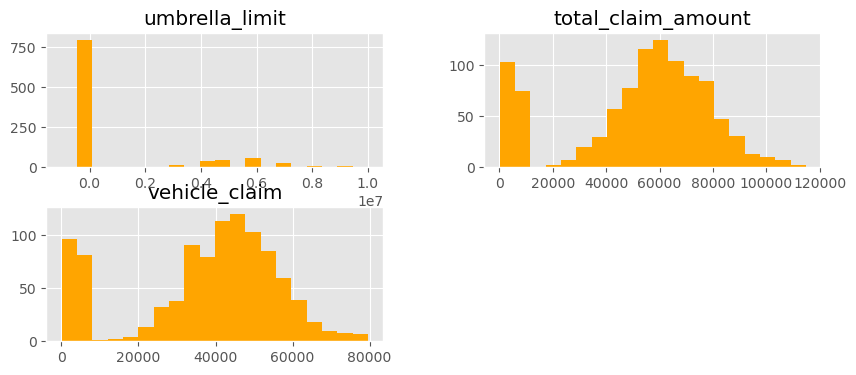

In [345]:
insurance_data[['umbrella_limit','total_claim_amount','vehicle_claim']].hist(bins=20,figsize=(10,4),color='orange')
plt.show()

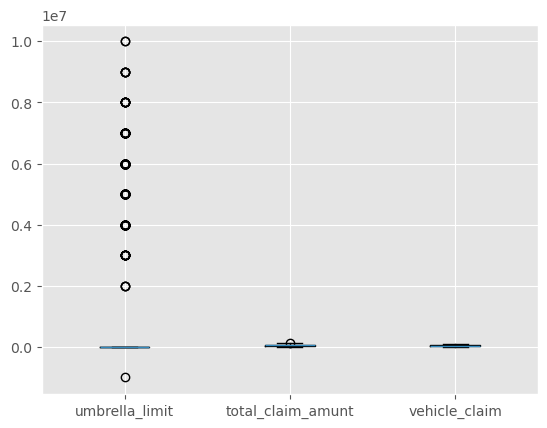

In [347]:
plt.boxplot(insurance_data[['umbrella_limit','total_claim_amount','vehicle_claim']].values)
plt.xticks([1,2,3],['umbrella_limit','total_claim_amunt','vehicle_claim'])
plt.show()

In [349]:
#am having -ve values in umbrella limit. in real world scenario umbrella limit doesn't have negative values
insurance_data=insurance_data[insurance_data['umbrella_limit']>=0]


In [351]:
print((insurance_data['umbrella_limit'] < 0).sum())  # Should be 0 now


0


In [353]:
#treating outlier
insurance_data['umbrella_limit']=np.log1p(insurance_data['umbrella_limit'])



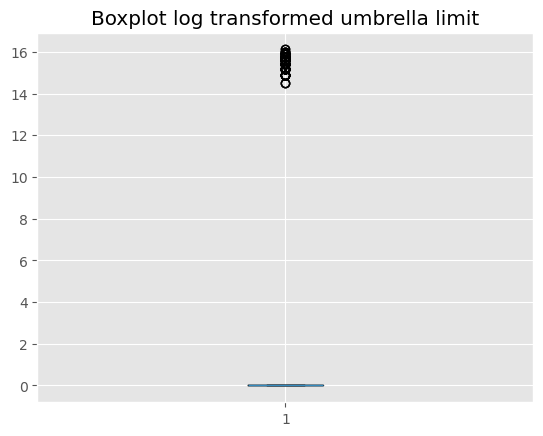

1.4944987932625278

In [355]:
plt.boxplot(insurance_data['umbrella_limit'].values)
plt.title("Boxplot log transformed umbrella limit")
plt.show()
insurance_data['umbrella_limit'].skew()
#print(insurance_data['umbrella_limit_log'])

In [357]:
# Calculate Q1, Q3, and IQR
Q1 = insurance_data['umbrella_limit'].quantile(0.25)
Q3 = insurance_data['umbrella_limit'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows that are outliers
outliers = insurance_data[
    (insurance_data['umbrella_limit'] < lower_bound) |
    (insurance_data['umbrella_limit'] > upper_bound)
]

# Print only the outlier values
print("Outlier values in 'umbrella_limit':")
print(outliers[['umbrella_limit', 'umbrella_limit']])


Outlier values in 'umbrella_limit':
     umbrella_limit  umbrella_limit
1         15.424949       15.424949
2         15.424949       15.424949
3         15.607270       15.607270
4         15.607270       15.607270
10        15.201805       15.201805
..              ...             ...
977       15.201805       15.201805
987       15.201805       15.201805
990       14.914123       14.914123
997       14.914123       14.914123
998       15.424949       15.424949

[201 rows x 2 columns]


In [363]:
insurance_data.dtypes

months_as_customer               int64
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                 float64
insured_sex                      int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
fraud_reported                   int32
dtype: object

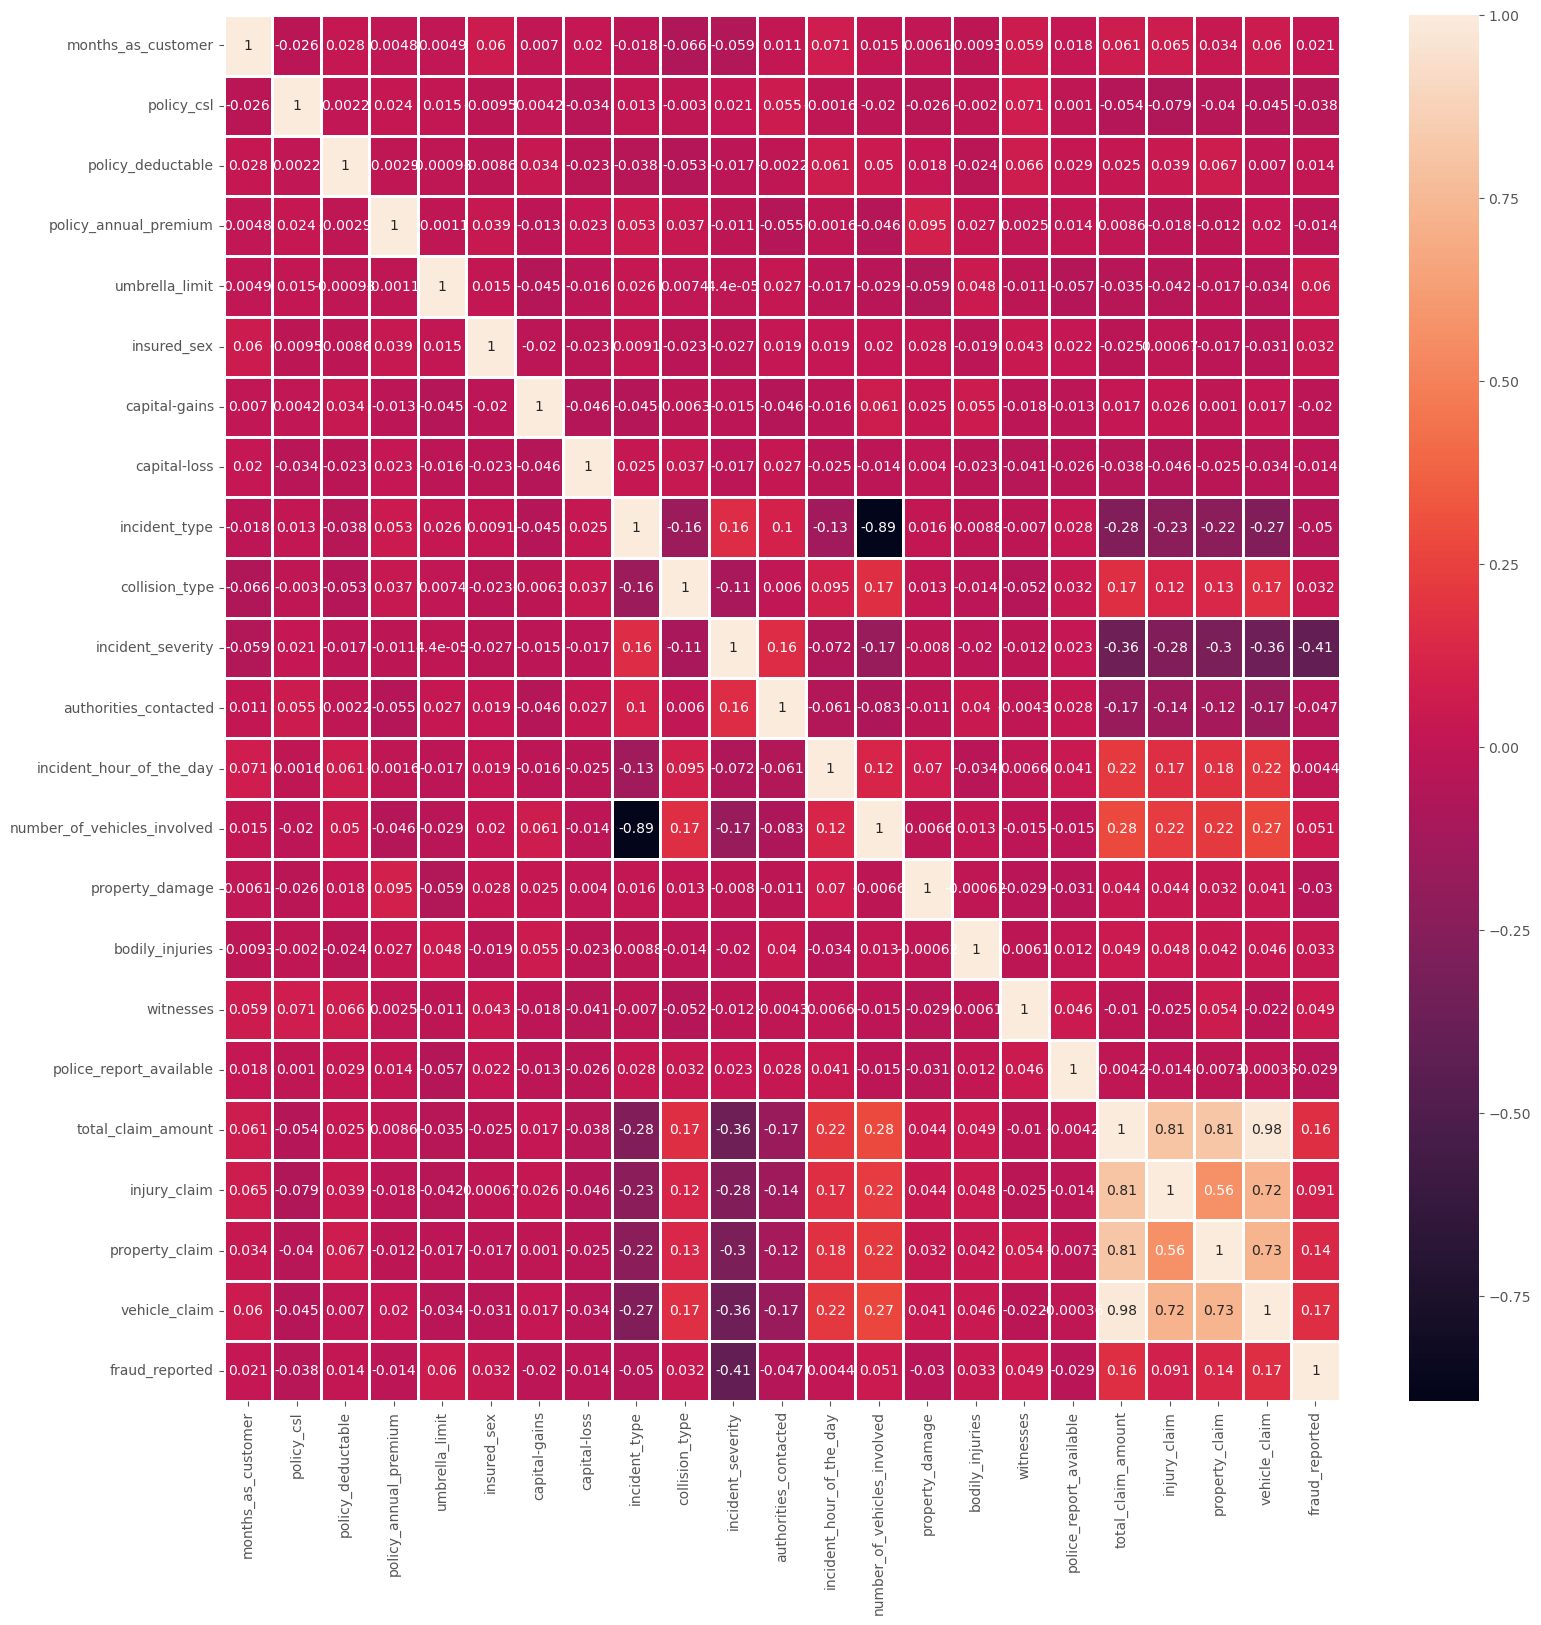

In [365]:


#heatmap
plt.figure(figsize=(18,18))
corr=insurance_data.corr()
sns.heatmap(data=corr,annot=True,fmt='.2g',linewidth=1)
plt.show()

In [366]:
#train data
from sklearn.model_selection import train_test_split
x=insurance_data.drop(['fraud_reported'],axis=1)
y=insurance_data['fraud_reported']
#split our data first
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [369]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler
x.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim'],
      dtype='object')

In [371]:
#x_train_scaled=scaler.fit_transform(x_train)
#x_test_scaled=scaler.transform(x_test)

In [373]:
#MODEL BUILDING
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [375]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [377]:
y_pred=rf.predict(x_test)

In [379]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [381]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))


Accuracy: 0.76

Confusion Matrix:
 [[133  19]
 [ 29  19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       152
           1       0.50      0.40      0.44        48

    accuracy                           0.76       200
   macro avg       0.66      0.64      0.64       200
weighted avg       0.74      0.76      0.75       200



In [383]:
from sklearn.model_selection import GridSearchCV

In [385]:
param_grid = {
    'n_estimators': [100, 200,300],          # Number of trees
    'max_depth': [None, 10,15,20],         # Maximum depth of each tree
    'min_samples_split': [5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples at leaf node
    'class_weight': [None, 'balanced',{0:1,1:2},{0:1,1:3}]       # Handle class imbalance
}


In [387]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='f1',            # Optimize for F1-score (good for imbalanced data)
    n_jobs=-1,               # Use all CPU cores
    verbose=2
)


In [389]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 3}],
                         'max_depth': [None, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [391]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [393]:
grid_prediction=grid_search.predict(x_test)

In [395]:
print("Accuracy:",accuracy_score(y_test,grid_prediction))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,grid_prediction))
print("\nClassification Report:\n",classification_report(y_test,grid_prediction))


Accuracy: 0.8

Confusion Matrix:
 [[128  24]
 [ 16  32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       152
           1       0.57      0.67      0.62        48

    accuracy                           0.80       200
   macro avg       0.73      0.75      0.74       200
weighted avg       0.81      0.80      0.80       200



# Get predicted probabilities
y_probs = grid_search.predict_proba(x_test)[:, 1]

# Adjust threshold from 0.5 to something lower, like 0.4
from sklearn.metrics import confusion_matrix, classification_report

custom_threshold = 0.4
y_pred_thresh = (y_probs >= custom_threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))


In [279]:
import joblib

In [397]:
joblib.dump(grid_search.best_estimator_,'updatedfraud_model.pkl')

['updatedfraud_model.pkl']

In [399]:
joblib.dump(label_encoders, 'label_encoders.joblib')

['label_encoders.joblib']

In [168]:
#joblib.dump(encoded_col,'label_encoders.pkl')

['label_encoders.pkl']